# Advanced NumPy tutorial

PROTO204, July 3rd, 2017

Bartosz Teleńczuk and OSS comunity

*e-mail*: mail@telenczuk.pl <br/>
*website*: http://neuroscience.telenczuk.pl

## Requirements

* Python 3.x
* Jupyter Notebook
* NumPy >= 1.10
* matplotlib

If you use [anaconda](https://www.continuum.io/downloads) you can install them with:

```
conda create -n advanced_numpy python=3 notebook numpy matplotlib
source activate advanced_numpy
```

## Setup


1. Download the archive with materials [python-workshop-master.zip](https://github.com/paris-saclay-cds/python-workshop/archive/master.zip) and save it to your Desktop. 

    *Hint*: Alternatively, if you know git, you can also clone the repository.

3. Unzip the file.

4. Open a terminal and change to the created folder:

    ```
$ cd
$ cd Desktop/python-workshop-master/Day_1_Scientific_Python
    ```

5. Run Jupyter notebook.

    ```
    $ jupyter notebook
    ```

## Other materials

* Gaël Varoquaux, Emmanuelle Gouillart and Olav Vahtras (editors), [SciPy Lectures](http://scipy-lectures.org)
* Software Carpentry community, [Programming with Python](http://swcarpentry.github.io/python-novice-inflammation/)
* NumPy community, [NumPy Docs](http://docs.scipy.org/doc/numpy/)
* Nicolas Rougier, [100 NumPy exercises](https://github.com/rougier/numpy-100)
* Nicolas Rougier, [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/index.html)
* Bartosz Teleńczuk, [Advanced NumPy lesson](https://github.com/paris-swc/advanced-numpy-lesson)


# What is NumPy?

* memory-efficient container for multi-dimensional homogeneous (mainly numerical) data (NumPy array)

* fast vectorised operations on arrays

* library general purpose functions: data reading/writing, linear algebra, FFT etc. (for more wait for SciPy lecture)

* main applications: signal processing, image processing, analysis of raw data from measurment instruments


## Importing NumPy

In [1]:
import numpy as np

In [2]:
new_array = np.array([1, 2, 3, 4])
print(new_array)

[1 2 3 4]


### Exercise

Create the following array and store in a new variable called `a`:

```
[0, 5, 8, 10]
```

## Loading data

We are studying inflammation in patients who have been given a new treatment for arthritis, and need to analyze the first dozen data sets of their daily inflammation. The data sets are stored in comma-separated values (CSV) format: each row holds information for a single patient, and the columns represent successive days. The first few rows of our first file look like this:

In [3]:
# %load data/inflammation-01.csv
0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1
0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1
0,0,1,2,2,4,2,1,6,4,7,6,6,9,9,15,4,16,18,12,12,5,18,9,5,3,10,3,12,7,8,4,7,3,5,4,4,3,2,1
0,0,2,2,4,2,2,5,5,8,6,5,11,9,4,13,5,12,10,6,9,17,15,8,9,3,13,7,8,2,8,8,4,2,3,5,4,1,1,1
0,0,1,2,3,1,2,3,5,3,7,8,8,5,10,9,15,11,18,19,20,8,5,13,15,10,6,10,6,7,4,9,3,5,2,5,3,2,2,1
0,0,0,3,1,5,6,5,5,8,2,4,11,12,10,11,9,10,17,11,6,16,12,6,8,14,6,13,10,11,4,6,4,7,6,3,2,1,0,0
0,1,1,2,1,3,5,3,5,8,6,8,12,5,13,6,13,8,16,8,18,15,16,14,12,7,3,8,9,11,2,5,4,5,1,4,1,2,0,0
0,1,0,0,4,3,3,5,5,4,5,8,7,10,13,3,7,13,15,18,8,15,15,16,11,14,12,4,10,10,4,3,4,5,5,3,3,2,2,1
0,1,0,0,3,4,2,7,8,5,2,8,11,5,5,8,14,11,6,11,9,16,18,6,12,5,4,3,5,7,8,3,5,4,5,5,4,0,1,1
0,0,2,1,4,3,6,4,6,7,9,9,3,11,6,12,4,17,13,15,13,12,8,7,4,7,12,9,5,6,5,4,7,3,5,4,2,3,0,1
0,0,0,0,1,3,1,6,6,5,5,6,3,6,13,3,10,13,9,16,15,9,11,4,6,4,11,11,12,3,5,8,7,4,6,4,1,3,0,0
0,1,2,1,1,1,4,1,5,2,3,3,10,7,13,5,7,17,6,9,12,13,10,4,12,4,6,7,6,10,8,2,5,1,3,4,2,0,2,0
0,1,1,0,1,2,4,3,6,4,7,5,5,7,5,10,7,8,18,17,9,8,12,11,11,11,14,6,11,2,10,9,5,6,5,3,4,2,2,0
0,0,0,0,2,3,6,5,7,4,3,2,10,7,9,11,12,5,12,9,13,19,14,17,5,13,8,11,5,10,9,8,7,5,3,1,4,0,2,1
0,0,0,1,2,1,4,3,6,7,4,2,12,6,12,4,14,7,8,14,13,19,6,9,12,6,4,13,6,7,2,3,6,5,4,2,3,0,1,0
0,0,2,1,2,5,4,2,7,8,4,7,11,9,8,11,15,17,11,12,7,12,7,6,7,4,13,5,7,6,6,9,2,1,1,2,2,0,1,0
0,1,2,0,1,4,3,2,2,7,3,3,12,13,11,13,6,5,9,16,9,19,16,11,8,9,14,12,11,9,6,6,6,1,1,2,4,3,1,1
0,1,1,3,1,4,4,1,8,2,2,3,12,12,10,15,13,6,5,5,18,19,9,6,11,12,7,6,3,6,3,2,4,3,1,5,4,2,2,0
0,0,2,3,2,3,2,6,3,8,7,4,6,6,9,5,12,12,8,5,12,10,16,7,14,12,5,4,6,9,8,5,6,6,1,4,3,0,2,0
0,0,0,3,4,5,1,7,7,8,2,5,12,4,10,14,5,5,17,13,16,15,13,6,12,9,10,3,3,7,4,4,8,2,6,5,1,0,1,0
0,1,1,1,1,3,3,2,6,3,9,7,8,8,4,13,7,14,11,15,14,13,5,13,7,14,9,10,5,11,5,3,5,1,1,4,4,1,2,0
0,1,1,1,2,3,5,3,6,3,7,10,3,8,12,4,12,9,15,5,17,16,5,10,10,15,7,5,3,11,5,5,6,1,1,1,1,0,2,1
0,0,2,1,3,3,2,7,4,4,3,8,12,9,12,9,5,16,8,17,7,11,14,7,13,11,7,12,12,7,8,5,7,2,2,4,1,1,1,0
0,0,1,2,4,2,2,3,5,7,10,5,5,12,3,13,4,13,7,15,9,12,18,14,16,12,3,11,3,2,7,4,8,2,2,1,3,0,1,1
0,0,1,1,1,5,1,5,2,2,4,10,4,8,14,6,15,6,12,15,15,13,7,17,4,5,11,4,8,7,9,4,5,3,2,5,4,3,2,1
0,0,2,2,3,4,6,3,7,6,4,5,8,4,7,7,6,11,12,19,20,18,9,5,4,7,14,8,4,3,7,7,8,3,5,4,1,3,1,0
0,0,0,1,4,4,6,3,8,6,4,10,12,3,3,6,8,7,17,16,14,15,17,4,14,13,4,4,12,11,6,9,5,5,2,5,2,1,0,1
0,1,1,0,3,2,4,6,8,6,2,3,11,3,14,14,12,8,8,16,13,7,6,9,15,7,6,4,10,8,10,4,2,6,5,5,2,3,2,1
0,0,2,3,3,4,5,3,6,7,10,5,10,13,14,3,8,10,9,9,19,15,15,6,8,8,11,5,5,7,3,6,6,4,5,2,2,3,0,0
0,1,2,2,2,3,6,6,6,7,6,3,11,12,13,15,15,10,14,11,11,8,6,12,10,5,12,7,7,11,5,8,5,2,5,5,2,0,2,1
0,0,2,1,3,5,6,7,5,8,9,3,12,10,12,4,12,9,13,10,10,6,10,11,4,15,13,7,3,4,2,9,7,2,4,2,1,2,1,1
0,0,1,2,4,1,5,5,2,3,4,8,8,12,5,15,9,17,7,19,14,18,12,17,14,4,13,13,8,11,5,6,6,2,3,5,2,1,1,1
0,0,0,3,1,3,6,4,3,4,8,3,4,8,3,11,5,7,10,5,15,9,16,17,16,3,8,9,8,3,3,9,5,1,6,5,4,2,2,0
0,1,2,2,2,5,5,1,4,6,3,6,5,9,6,7,4,7,16,7,16,13,9,16,12,6,7,9,10,3,6,4,5,4,6,3,4,3,2,1
0,1,1,2,3,1,5,1,2,2,5,7,6,6,5,10,6,7,17,13,15,16,17,14,4,4,10,10,10,11,9,9,5,4,4,2,1,0,1,0
0,1,0,3,2,4,1,1,5,9,10,7,12,10,9,15,12,13,13,6,19,9,10,6,13,5,13,6,7,2,5,5,2,1,1,1,1,3,0,1
0,1,1,3,1,1,5,5,3,7,2,2,3,12,4,6,8,15,16,16,15,4,14,5,13,10,7,10,6,3,2,3,6,3,3,5,4,3,2,1
0,0,0,2,2,1,3,4,5,5,6,5,5,12,13,5,7,5,11,15,18,7,9,10,14,12,11,9,10,3,2,9,6,2,2,5,3,0,0,1
0,0,1,3,3,1,2,1,8,9,2,8,10,3,8,6,10,13,11,17,19,6,4,11,6,12,7,5,5,4,4,8,2,6,6,4,2,2,0,0
0,1,1,3,4,5,2,1,3,7,9,6,10,5,8,15,11,12,15,6,12,16,6,4,14,3,12,9,6,11,5,8,5,5,6,1,2,1,2,0
0,0,1,3,1,4,3,6,7,8,5,7,11,3,6,11,6,10,6,19,18,14,6,10,7,9,8,5,8,3,10,2,5,1,5,4,2,1,0,1
0,1,1,3,3,4,4,6,3,4,9,9,7,6,8,15,12,15,6,11,6,18,5,14,15,12,9,8,3,6,10,6,8,7,2,5,4,3,1,1
0,1,2,2,4,3,1,4,8,9,5,10,10,3,4,6,7,11,16,6,14,9,11,10,10,7,10,8,8,4,5,8,4,4,5,2,4,1,1,0
0,0,2,3,4,5,4,6,2,9,7,4,9,10,8,11,16,12,15,17,19,10,18,13,15,11,8,4,7,11,6,7,6,5,1,3,1,0,0,0
0,1,1,3,1,4,6,2,8,2,10,3,11,9,13,15,5,15,6,10,10,5,14,15,12,7,4,5,11,4,6,9,5,6,1,1,2,1,2,1
0,0,1,3,2,5,1,2,7,6,6,3,12,9,4,14,4,6,12,9,12,7,11,7,16,8,13,6,7,6,10,7,6,3,1,5,4,3,0,0
0,0,1,2,3,4,5,7,5,4,10,5,12,12,5,4,7,9,18,16,16,10,15,15,10,4,3,7,5,9,4,6,2,4,1,4,2,2,2,1
0,1,2,1,1,3,5,3,6,3,10,10,11,10,13,10,13,6,6,14,5,4,5,5,9,4,12,7,7,4,7,9,3,3,6,3,4,1,2,0
0,1,2,2,3,5,2,4,5,6,8,3,5,4,3,15,15,12,16,7,20,15,12,8,9,6,12,5,8,3,8,5,4,1,3,2,1,3,1,0
0,0,0,2,4,4,5,3,3,3,10,4,4,4,14,11,15,13,10,14,11,17,9,11,11,7,10,12,10,10,10,8,7,5,2,2,4,1,2,1
0,0,2,1,1,4,4,7,2,9,4,10,12,7,6,6,11,12,9,15,15,6,6,13,5,12,9,6,4,7,7,6,5,4,1,4,2,2,2,1
0,1,2,1,1,4,5,4,4,5,9,7,10,3,13,13,8,9,17,16,16,15,12,13,5,12,10,9,11,9,4,5,5,2,2,5,1,0,0,1
0,0,1,3,2,3,6,4,5,7,2,4,11,11,3,8,8,16,5,13,16,5,8,8,6,9,10,10,9,3,3,5,3,5,4,5,3,3,0,1
0,1,1,2,2,5,1,7,4,2,5,5,4,6,6,4,16,11,14,16,14,14,8,17,4,14,13,7,6,3,7,7,5,6,3,4,2,2,1,1
0,1,1,1,4,1,6,4,6,3,6,5,6,4,14,13,13,9,12,19,9,10,15,10,9,10,10,7,5,6,8,6,6,4,3,5,2,1,1,1
0,0,0,1,4,5,6,3,8,7,9,10,8,6,5,12,15,5,10,5,8,13,18,17,14,9,13,4,10,11,10,8,8,6,5,5,2,0,2,0
0,0,1,0,3,2,5,4,8,2,9,3,3,10,12,9,14,11,13,8,6,18,11,9,13,11,8,5,5,2,8,5,3,5,4,1,3,1,1,0


In [4]:
data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

## Explore array

In [5]:
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


In [6]:
print(data.dtype)
print(data.shape)

float64
(60, 40)


We can plot the data using `matplotlib` library:

In [7]:
import matplotlib.pyplot as plt
plt.matshow(data)
plt.show()

<Figure size 400x600 with 1 Axes>

Note that the figure appears only after you call `plt.show()` function. In Jupyter notebook you can show figure directly in the notebook using this command:

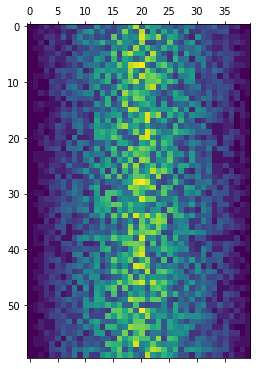

In [8]:
%matplotlib inline
plt.matshow(data)

## Indexing

Note that the NumPy arrays are zero-indexed:

In [9]:
data[0, 0]

0.0

It means that that the third element in the first row has an index of [0, 2]:

In [10]:
data[0, 2]

1.0

We can also assign the element with a new value:

In [11]:
data[0, 2] = 100.
print(data[0, 2])

100.0


NumPy (and Python in general) checks the bounds of the array:

In [12]:
print(data.shape)
data[60, 0]

(60, 40)


IndexError: index 60 is out of bounds for axis 0 with size 60

Finally, we can ask for several elements at once:

In [13]:
data[0, [0, 10]]

array([0., 3.])

## Slices

You can select ranges of elements using slices. To select first two columns from the first row, you can use:

In [14]:
data[0, 0:2]

array([0., 0.])

Note that the returned array does not include third column (with index 2).

You can skip the first or last index (which means, take the values from the beginning or to the end):

In [15]:
data[0, :2]

array([0., 0.])

If you omit both indices in the slice leaving out only the colon (`:`), you will get all columns of this row:

In [16]:
data[0, :]

array([  0.,   0., 100.,   3.,   1.,   2.,   4.,   7.,   8.,   3.,   3.,
         3.,  10.,   5.,   7.,   4.,   7.,   7.,  12.,  18.,   6.,  13.,
        11.,  11.,   7.,   7.,   4.,   6.,   8.,   8.,   4.,   4.,   5.,
         7.,   3.,   4.,   2.,   3.,   0.,   0.])

We now can plot the values in this row as a line plot:

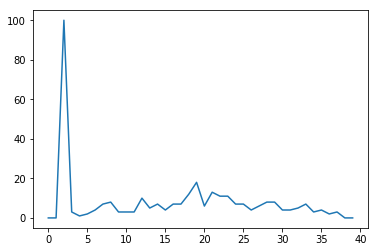

In [17]:
plt.plot(data[0, :])

## Filtering data

It's also possible to select elements (filter) based on a condition. For example, to select all measurments above 10 in the first patient we can use:

In [18]:
patient_data = data[0, :]
patient_data[patient_data>10]

array([100.,  12.,  18.,  13.,  11.,  11.])

We can also substitute the measurement with a new value:


In [19]:
patient_data[patient_data>10] = 10
print(patient_data)

[ 0.  0. 10.  3.  1.  2.  4.  7.  8.  3.  3.  3. 10.  5.  7.  4.  7.  7.
 10. 10.  6. 10. 10. 10.  7.  7.  4.  6.  8.  8.  4.  4.  5.  7.  3.  4.
  2.  3.  0.  0.]


<div class="alert alert-warning">
**Warning**

Please note that changing `patient_data` in the previous example, will also modify the original `data` array from which the row was extracted. The reason is that taking a slice does not copy a data, only gives a new view on it. 
</div>

### Quiz 

Imagine the following array `a`:

```
>> print(a)
[0, 5, 8, 10]
```

Which of the following commands will give this output:

```
[5, 8]
```

a) `print(a[1, 2])`

b) `print(a[2:3])`

c) `print(a[1:2])`

d) `print(a[[1, 2]])`

e) `print(a[a<10])`

You can test your guess by creating the `a` array:

```
a = np.array([0, 5, 8, 10])
```

## Operations

By default additions/subtractions/etc. are elementwise:

In [20]:
doubledata = data + data
print(doubledata)

[[ 0.  0. 20. ...  6.  0.  0.]
 [ 0.  2.  4. ...  2.  0.  2.]
 [ 0.  2.  2. ...  4.  2.  2.]
 ...
 [ 0.  2.  2. ...  2.  2.  2.]
 [ 0.  0.  0. ...  0.  4.  0.]
 [ 0.  0.  2. ...  2.  2.  0.]]


Operations by scalar:

In [21]:
tripledata = data * 3
print(tripledata)


[[ 0.  0. 30. ...  9.  0.  0.]
 [ 0.  3.  6. ...  3.  0.  3.]
 [ 0.  3.  3. ...  6.  3.  3.]
 ...
 [ 0.  3.  3. ...  3.  3.  3.]
 [ 0.  0.  0. ...  0.  6.  0.]
 [ 0.  0.  3. ...  3.  3.  0.]]


Some functions can be applied elementwise:

In [22]:
expdata = np.exp(data)
print(expdata)

[[1.00000000e+00 1.00000000e+00 2.20264658e+04 ... 2.00855369e+01
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.71828183e+00 7.38905610e+00 ... 2.71828183e+00
  1.00000000e+00 2.71828183e+00]
 [1.00000000e+00 2.71828183e+00 2.71828183e+00 ... 7.38905610e+00
  2.71828183e+00 2.71828183e+00]
 ...
 [1.00000000e+00 2.71828183e+00 2.71828183e+00 ... 2.71828183e+00
  2.71828183e+00 2.71828183e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  7.38905610e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 2.71828183e+00 ... 2.71828183e+00
  2.71828183e+00 1.00000000e+00]]


<div class="alert alert-warning">
**Warning**

Standard Python installation also includes the `math` library, but it does not play nicely with NumPy array, so avoid using it with NumPy arrays.
</div>

Some functions (such as mean, max, etc.) aggregate the data return arrays of less dimensions or scalars:

In [23]:
meandata = np.mean(data)
print(meandata)

6.14625


By default the NumPy `mean` function It's also possbile to average over a single axis:

In [24]:
np.mean(data, 0)

array([ 0.        ,  0.45      ,  1.26666667,  1.75      ,  2.43333333,
        3.15      ,  3.8       ,  3.88333333,  5.23333333,  5.51666667,
        5.95      ,  5.9       ,  8.35      ,  7.73333333,  8.36666667,
        9.5       ,  9.58333333, 10.63333333, 11.53333333, 12.21666667,
       13.25      , 11.91666667, 11.01666667, 10.15      , 10.        ,
        8.66666667,  9.15      ,  7.25      ,  7.33333333,  6.58333333,
        6.06666667,  5.95      ,  5.11666667,  3.6       ,  3.3       ,
        3.56666667,  2.48333333,  1.5       ,  1.13333333,  0.56666667])

### Exercise

Average the inflammation data over the first ten patients (rows) and plot them across time (columns). Then repeat it for the next ten patients and so on. Try putting all averages on a single plot.

## Broadcasting

It’s possible to do operations on arrays of different sizes. In some cases NumPy can transform these arrays automatically so that they behave like same-sized arrays. This conversion is called **broadcasting**. For example we can 

In [25]:
data - np.mean(data, 0)

array([[ 0.        , -0.45      ,  8.73333333, ...,  1.5       ,
        -1.13333333, -0.56666667],
       [ 0.        ,  0.55      ,  0.73333333, ..., -0.5       ,
        -1.13333333,  0.43333333],
       [ 0.        ,  0.55      , -0.26666667, ...,  0.5       ,
        -0.13333333,  0.43333333],
       ...,
       [ 0.        ,  0.55      , -0.26666667, ..., -0.5       ,
        -0.13333333,  0.43333333],
       [ 0.        , -0.45      , -1.26666667, ..., -1.5       ,
         0.86666667, -0.56666667],
       [ 0.        , -0.45      , -0.26666667, ..., -0.5       ,
        -0.13333333, -0.56666667]])


### Exercise

Given the following array:

``a = np.array([[2, 3, 1], [4, 1, 1]])``

For each column of a subtract mean across rows. Next, from each row subtract its mean across columns.

**Tip**: You can use `a.T` to transpose the array.